# Python project - Invoice classifier

Imports

In [80]:
import cv2
import numpy as np
import pytesseract
from PIL import Image
import re    #For regular expression
import shutil    # For copying
import os.path
from nltk.stem import PorterStemmer
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

Path of working folder

In [81]:
# Path of working folder on Disk
src_path = "./"

#For nltk creating instance like of PorterStemmer
ps = PorterStemmer()

Creating various directories- if not already existing

In [82]:
# create directories for categories:

if (not os.path.exists("./temp/")):
    os.mkdir("./temp/")

if (not os.path.exists("./output")):
    os.mkdir("./output")
    
if (not os.path.exists("./output/food_bills")):
    os.mkdir("./output/food_bills")
if (not os.path.exists("./output/electricity_bills")):
    os.mkdir("./output/electricity_bills")
if (not os.path.exists("./output/phone_bills")):
    os.mkdir("./output/phone_bills")
if (not os.path.exists("./output/medicine_bills")):
    os.mkdir("./output/medicine_bills")
if (not os.path.exists("./output/school_bills")):
    os.mkdir("./output/school_bills")

Reading image through openCV and getting text from image using tesseract-OCR and pytesseract

In [83]:
def get_img_text(img_path):
    
    # Read image with opencv
    img = cv2.imread(img_path)

    #Displaying the image
    #cv2.imshow('Your selected image',img)
    
    # Convert to grayscale
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply dilation and erosion to remove some noise
    kernel = np.ones((1, 1), np.uint8)
    img = cv2.dilate(img, kernel, iterations=1)
    img = cv2.erode(img, kernel, iterations=1)

    # Write image after removed noise
    cv2.imwrite(f"{src_path}/temp/removed_noise.png", img)

    # Write the image after apply opencv to do some ...
    cv2.imwrite(f"{src_path}/temp/thres.png", img)

    # Recognize text from the image with tesseract-ocr and pytesseract
    result = pytesseract.image_to_string(Image.open(f"{src_path}/temp/thres.png"))

    return result

Reference lists initialization

In [84]:
# reference lists
food_list = ['food','restaur','restro','court','dine','tiffin','eateri','eat','cafe','cafeteria','drink','bar','grill','paneer','egg','fresh','farm','egg','chicken','paneer','coffe','tea','bread','chees','pizza','beer','tabl','soup','salad','dessert','cake']
electricity_list = ['led','light','bulb','tubelight','electr','torrent','unit','consum','consumpt','read','energy','energi','power','meter']
phone_list = ['number','mobil','telephon','phone','mobilephon','cellphon','landlin','airtel','jio','vodafon','lenovo','micromax','charg','charger','earphon','minut','hour','second','talktim','data','internet','messag','call','brand','handset','plan','tariff']
medicine_list = ['pharmaci','medicin','hospit','medic','crocin','paracetamol','pharma','pharmaceut','blood']
school_list = ['school','tution','fee','computer','admiss','colleg','transport','student','bus']

In [85]:
main_food = 0
main_electricity = 0
main_phone = 0
main_medicine = 0
main_school = 0
main_other = 0

Splitting extracted text and also removing special characters

In [86]:
def text_preprocessing(text_extracted):
    
    # replace special symbols by space by use of regular expression
    clean_text = re.sub('[^A-Za-z0-9]+', ' ', text_extracted)
    
    #Converting text extracted to lower case and splitting by lines and space
    clean_text = clean_text.lower()
    clean_text_list = clean_text.split()
    
    #print("\n\nText after splitting by lines and space: \n", clean_text_list,"\n")
    
    return clean_text_list

Determine the category of the invoice

In [87]:
def categorize_image(text_extracted):
    
    #print(f"\n\nReference Lists are: \n{food_list} \n{electricity_list} \n{phone_list} \n{medicine_list} \n{school_list}")

    clean_text_list = text_preprocessing(text_extracted)
    
    counter = {
        'food' : 0,
        'electricity' : 0,
        'phone' : 0,
        'medicine' : 0,
        'school' : 0
    }
    
    for word in clean_text_list:
        #Stemming each word with nltk PorterStemmer
        word = ps.stem(word)
          
        if word in food_list:
            counter['food']+=1
            #print("\nFood list-", word)
        elif word in electricity_list:
            counter['electricity']+=1
            #print("\nElectricity list-", word)
        elif word in phone_list:
            counter['phone']+=1
            #print("\nPhone list-", word)
        elif word in medicine_list:
            counter['medicine']+=1
            #print("\nMedicine list-", word)
        elif word in school_list:
            counter['school']+=1
            #print("\nSchool list-", word)
        else:
            #print(".", end='')
            print(end='')
        
    #Finding which category has maximum keyword matches
    predicted_category = max(counter, key=counter.get)
    #print(f"Max: {predicted_category} = {max(counter.values())}")
    
    df = pd.DataFrame(columns=["Matches"],index=counter.keys(),data=counter.values())
    
    return (predicted_category, df)
    

Once categorized storing images in different folders as per the category

In [88]:
def save_output_copy(category, img_path):
    
    global main_food
    #print(main_food,type(main_food))
    global main_electricity
    global main_phone
    global main_medicine
    global main_school
    global main_other
    
    img_file_name = os.path.basename(img_path)
    
    if(category == 'food'):
        print("\nThis is a FOOD BILL...")
        main_food+=1
        if (not os.path.exists(r"./output/food_bills/" + img_file_name)):
            shutil.copy(img_path, r"./output/food_bills/")
        else:
            print(f"File already exists at output location!! : {img_file_name} ******")
    
    elif(category == 'electricity'):
        print("\nThis is an ELECTRICITY BILL...")
        main_electricity+=1
        if (not os.path.exists(r"./output/electricity_bills/" + img_file_name)):
            shutil.copy(img_path, r"./output/electricity_bills/")
        else:
            print(f"File already exists at output location!! : {img_file_name} ******")
    
    elif(category == 'phone'):
        print("\nThis is a PHONE BILL...")
        main_phone+=1
        if (not os.path.exists(r"./output/phone_bills/" + img_file_name)):
            shutil.copy(img_path, r"./output/phone_bills/")
        else:
            print(f"File already exists at output location!! : {img_file_name} ******")
    
    elif(category == 'medicine'):
        print("\nThis is a MEDICINE/PHARMACY BILL...")
        main_medicine+=1
        if (not os.path.exists(r"./output/medicine_bills/" + img_file_name)):
            shutil.copy(img_path, r"./output/medicine_bills/")
        else:
            print(f"File already exists at output location!! : {img_file_name} ******")
    
    elif(category == 'school'):
        print("\nThis is a SCHOOL FEE BILL...")
        main_school+=1
        if (not os.path.exists(r"./output/school_bills/" + img_file_name)):
            shutil.copy(img_path, r"./output/school_bills/")
        else:
            print(f"File already exists at output location!! : {img_file_name} ******")
    else:
        print("This is some other bill")

    print (f"------ File copied in \'./output/{category}_bills/\' directory -------")

Visualizing each image using seaborn

In [89]:
def visualize_prediction(df,img_name):
    plt.figure()
    plt.title(img_name,size=16)
    plt.xlabel("Categories")
    sns.barplot(data=df, x=df.index, y='Matches')

Visualizng total bills and their category 

In [90]:
def visualize_total_count(main_food,main_electricity,main_phone,main_medicine,main_school):
    counter={
        'total_food' : main_food,
        'total_electricity' : main_electricity,
        'total_phone' : main_phone,
        'total_medicine' : main_medicine,
        'total_school' : main_school
    }
    
    df=pd.DataFrame(columns=["Total count"],index=counter.keys(),data=counter.values())
    
    plt.figure()
    plt.title("Total categorized bills",size=20)
    plt.xlabel("Categories")
    sns.barplot(data=df, x=df.index, y='Total count')

Execution starts from here...
Getting user input of invoices

-------------------INVOICE CLASSIFIER-------------------


Enter folder name or image name: dataset/nbill7.jpg


----------- Initiating (file) : Recognizing text from image ./dataset/nbill7.jpg -----------

The text recognized from image is: 
 DEMO PHARMA DISTRIBUTORS

Pharmaceutical Distributors

F-11, Roshanara Plaza, Roshanara Road,
Delhi-110007 (India)

Phone ; +91-11-23994444 (30 Line Fax : +91-11-43850066 E.Mail : Info@margcompusoft.com

TAX INVOICE

DLNo. :32132 208/218 TIN : 3456789012 CST No, : 3456789012
M/s AHUJA MEDICINE CENTRE Invoice No.: 0036 Date :
BUDHA BAZAR, Order No. :DG-2002 Date:
DELHI L.R.No. : 131345 Date:
Cases : 10

BENGE 18 Transport : ABC TPT.
TIN No 3213123, Due Date : 10-04-2004

S| Product Packing | Mfr. | Batch Qty. Fred M.R.P. Rate|vat% Amount

POLYBION SYP 100ML 100ML EMERK P| 562862000 10 18.82 | 15.26 42.50 152.60
AMLOGARD 5MG. 10'S Puizer L| 02005016 3 0.00 | 39.50 |4.00 118.50
BECOSULE 10X10, PHIZER L| 00739 6 115.10 | 101.90 |4.00 611.40
AZMIN CAP

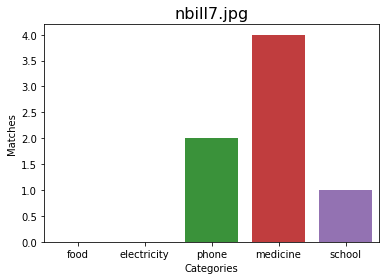

In [96]:
global main_food
#print(main_food,type(main_food))
global main_electricity
global main_phone
global main_medicine
global main_school
global main_other
    
#while(True):
print("-------------------INVOICE CLASSIFIER-------------------")
input_path = input("\n\nEnter folder name or image name: ")
#print(input_path,"\n",src_path+input_path)
full_path = src_path + input_path

#Checking if path exists
if (os.path.exists(full_path)):
    
    #Checking if path is a directory
    if(os.path.isdir(full_path)):
        dir_list = os.listdir(full_path)
        print(f"\n\nFiles and directories in {full_path} are : ")  
        print(dir_list)
        
        for i in dir_list:
            if ('.jpg' in i or '.png' in i or '.bmp' in i or '.jpeg' in i or '.JPG' in i or '.PNG' in i):
                print (f'\n\n---------- Initiating (directory) : Recognizing text from {i} ----------')
                img_path = full_path + "/" + i

                # run OCR to extract text from image
                text_extracted = get_img_text(img_path)

                # process the text to predict the category of the invoice
                predicted_category, df = categorize_image(text_extracted)

                # save output in categorized structure
                save_output_copy(predicted_category, img_path)

                # visualize using seaborn each image
                visualize_prediction(df,i)

            else:
                print("Not a valid image file... Please try again ")
                pass

        #visualizing total categorized bills 
        visualize_total_count(main_food,main_electricity,main_phone,main_medicine,main_school)

        print("\n\nTotal number of food bills: ", main_food)
        print("Total number of electricity bills: ", main_electricity)
        print("Total number of phone bills: ", main_phone)
        print("Total number of medicine bills: ", main_medicine)
        print("Total number of school bills: ", main_school)
        #print("Other bills: ", main_other)

    else:    
        img_path = full_path
        #Getting image file name
        img_file_name = os.path.basename(img_path)
    
        #Checking if file is an image file
        if ('.jpg' in img_file_name or '.png' in img_file_name or '.bmp' in img_file_name or '.jpeg' in img_file_name or '.JPG' in img_file_name or '.PNG' in img_file_name):
            print (f'\n\n----------- Initiating (file) : Recognizing text from image {full_path} -----------')
            
            # run OCR to extract text from image
            text_extracted = get_img_text(img_path)
            print("\nThe text recognized from image is: \n",text_extracted)
            print("------------------------------------------------------------------------------------------------------")

            # process the text to predict the category of the invoice
            predicted_category, df = categorize_image(text_extracted)

            # save output in categorized structure
            save_output_copy(predicted_category, img_path)

            # visualize using seaborn
            img_file_name = os.path.basename(img_path)   #To get image file name
            visualize_prediction(df,img_file_name)

        else:
            print("Not a valid image file... Please try again later")
            
else:
    print("Path doesn't exist... Please try again later")